In [1]:
import pandas as pd

In [2]:
import sys

In [3]:
sys.path

['C:\\Users\\ajaco\\Desktop',
 'C:\\Users\\ajaco\\Desktop\\repos\\noreallyimfine\\deploying-machine-learning-models\\packages\\regression_model',
 'C:\\Users\\ajaco\\Anaconda3\\python37.zip',
 'C:\\Users\\ajaco\\Anaconda3\\DLLs',
 'C:\\Users\\ajaco\\Anaconda3\\lib',
 'C:\\Users\\ajaco\\Anaconda3',
 '',
 'C:\\Users\\ajaco\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\ajaco\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\ajaco\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\ajaco\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ajaco\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\ajaco\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ajaco\\.ipython']

In [4]:
df = pd.read_csv('C:\\Users\\ajaco\\Downloads\\ebd_relJan-2020.txt', sep='\t', nrows=10000)

print(df.shape)

df.head()

(10000, 46)


,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS
0,URN:CornellLabOfOrnithology:EBIRD:OBS635851573,2018-06-30 16:56:40,32793,species,Magnolia Warbler,Setophaga magnolia,NaN,NaN,2,NaN,...,NaN,1.0,1,NaN,0,1,0,NaN,"Historical data from 1995 computer print-out, ...",at berm area (SW corner) of North Golf Course
1,URN:CornellLabOfOrnithology:EBIRD:OBS659449016,2018-09-22 14:39:01,5893,species,White-rumped Sandpiper,Calidris fuscicollis,NaN,NaN,4,NaN,...,NaN,1.0,1,NaN,0,1,0,NaN,Feuillet d'ÉPOQ no 243616. Observateur : Gilbe...,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS681631650,2019-03-28 17:38:29,635,species,Common Scoter,Melanitta nigra,NaN,NaN,1,NaN,...,NaN,NaN,0,NaN,0,1,0,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS683242740,2018-12-29 13:08:07,6263,species,Ring-billed Gull,Larus delawarensis,NaN,NaN,15,NaN,...,NaN,1.0,1,G3629866,0,1,0,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS695389355,2019-01-07 13:49:08,32501,species,Red-winged Blackbird,Agelaius phoeniceus,NaN,NaN,500,NaN,...,NaN,3.0,1,G3736371,0,1,0,NaN,With Richard Knapton and Russ Tkachuk,NaN


In [5]:
df.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME',
       'SUBSPECIES SCIENTIFIC NAME', 'OBSERVATION COUNT',
       'BREEDING BIRD ATLAS CODE', 'BREEDING BIRD ATLAS CATEGORY', 'AGE/SEX',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK',
       'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID',
       'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE',
       'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM',
       'EFFORT AREA HA', 'NUMBER OBSERVERS', 'ALL SPECIES REPORTED',
       'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON',
       'TRIP COMMENTS', 'SPECIES COMMENTS'],
      dtype='object')

In [6]:
print('Earliest bird sighting: ', df['OBSERVATION DATE'].min())
print('Latest bird sighting: ', df['OBSERVATION DATE'].max())

Earliest bird sighting:  1885-06-05
Latest bird sighting:  1999-12-30


In [7]:
df['COMMON NAME'].nunique()

1497

In [8]:
df['COUNTRY'].nunique()

116

In [9]:
df['COUNTRY'].unique()

array(['United States', 'Canada', 'Sweden', 'Indonesia', 'Bermuda',
       'United Kingdom', 'Australia', 'Mexico', 'Poland', 'Malaysia',
       'Kenya', 'Spain', 'Argentina', 'Taiwan', 'India', 'Mali',
       'United Arab Emirates', 'Ecuador', 'Gambia', 'Belgium', 'Morocco',
       'France', 'Germany', 'Tanzania', 'Madagascar', 'Switzerland',
       'Thailand', 'Israel', 'Senegal', 'Brazil', 'Costa Rica', 'Oman',
       'Uruguay', 'Venezuela', 'Niger', 'Greece', 'Papua New Guinea',
       'Denmark', 'Mauritius', 'Peru', 'Tunisia', 'Hungary',
       'Netherlands', 'Norway', 'Puerto Rico', 'Portugal', 'Saudi Arabia',
       'Finland', 'Ireland', 'Russia', 'Panama', 'Japan', 'Turkey',
       'Philippines', 'New Zealand', 'Seychelles', 'Honduras', 'Suriname',
       'Guadeloupe', 'Guatemala', 'Sri Lanka', 'Austria', 'Jamaica',
       'Slovenia', 'Guyana', 'French Guiana', 'Bahamas', 'Hong Kong',
       'Iceland', 'Zambia', 'Zimbabwe', 'Paraguay', 'Trinidad and Tobago',
       'Barbados', 

In [12]:
countries = df['COUNTRY'].unique().tolist()

In [17]:
df['COUNTRY'].value_counts()

United States     5498
Canada            2264
United Kingdom     465
Australia          250
Taiwan             169
                  ... 
Cameroon             1
Bangladesh           1
Mauritania           1
Barbados             1
Cyprus               1
Name: COUNTRY, Length: 116, dtype: int64

In [18]:
df['COMMON NAME'].value_counts()

European Starling           132
American Robin              126
Mallard                     117
American Crow               112
Red-winged Blackbird        108
                           ... 
Masked Yellowthroat           1
Mottle-backed Elaenia         1
Ivory-billed Aracari          1
Silvery-fronted Tapaculo      1
Olive Flyrobin                1
Name: COMMON NAME, Length: 1497, dtype: int64

In [15]:
date_df = df[['COMMON NAME', 'COUNTRY', 'OBSERVATION DATE']]

In [20]:
rw_black = df[df['COMMON NAME'] == 'Red-winged Blackbird']

rw_black.shape

(108, 46)

In [22]:
rw_black['OBSERVATION DATE'].value_counts()

1973-03-04    2
1996-06-22    2
1994-05-21    2
1983-09-11    1
1980-04-29    1
             ..
1994-05-15    1
1979-05-20    1
1998-04-16    1
1976-06-15    1
1998-10-25    1
Name: OBSERVATION DATE, Length: 105, dtype: int64

In [23]:
rw_black.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME',
       'SUBSPECIES SCIENTIFIC NAME', 'OBSERVATION COUNT',
       'BREEDING BIRD ATLAS CODE', 'BREEDING BIRD ATLAS CATEGORY', 'AGE/SEX',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK',
       'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID',
       'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE',
       'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM',
       'EFFORT AREA HA', 'NUMBER OBSERVERS', 'ALL SPECIES REPORTED',
       'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON',
       'TRIP COMMENTS', 'SPECIES COMMENTS'],
      dtype='object')

In [24]:
rw_black.dtypes

GLOBAL UNIQUE IDENTIFIER         object
LAST EDITED DATE                 object
TAXONOMIC ORDER                   int64
CATEGORY                         object
COMMON NAME                      object
SCIENTIFIC NAME                  object
SUBSPECIES COMMON NAME           object
SUBSPECIES SCIENTIFIC NAME       object
OBSERVATION COUNT                object
BREEDING BIRD ATLAS CODE         object
BREEDING BIRD ATLAS CATEGORY     object
AGE/SEX                          object
COUNTRY                          object
COUNTRY CODE                     object
STATE                            object
STATE CODE                       object
COUNTY                           object
COUNTY CODE                      object
IBA CODE                         object
BCR CODE                        float64
USFWS CODE                       object
ATLAS BLOCK                      object
LOCALITY                         object
LOCALITY ID                      object
LOCALITY TYPE                    object


In [25]:
from datetime import datetime

In [41]:
s = '2005-05-15'
datetime.fromisoformat('2011-11-04').month

11

In [44]:
pd.to_datetime(rw_black['OBSERVATION DATE'], format='%Y-%m-%d')

4      1986-09-01
51     1992-04-19
288    1984-04-04
396    1994-05-03
530    1997-08-05
          ...    
9716   1987-05-15
9868   1997-04-26
9888   1992-03-29
9980   1994-08-25
9990   1981-06-20
Name: OBSERVATION DATE, Length: 108, dtype: datetime64[ns]

In [45]:
rw_black.dtypes

GLOBAL UNIQUE IDENTIFIER                object
LAST EDITED DATE                        object
TAXONOMIC ORDER                          int64
CATEGORY                                object
COMMON NAME                             object
SCIENTIFIC NAME                         object
SUBSPECIES COMMON NAME                  object
SUBSPECIES SCIENTIFIC NAME              object
OBSERVATION COUNT                       object
BREEDING BIRD ATLAS CODE                object
BREEDING BIRD ATLAS CATEGORY            object
AGE/SEX                                 object
COUNTRY                                 object
COUNTRY CODE                            object
STATE                                   object
STATE CODE                              object
COUNTY                                  object
COUNTY CODE                             object
IBA CODE                                object
BCR CODE                               float64
USFWS CODE                              object
ATLAS BLOCK  

In [52]:
rw_black['observ_month'] = pd.DatetimeIndex(rw_black['OBSERVATION DATE']).month

C:\Users\ajaco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
rw_black.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'SUBSPECIES COMMON NAME',
       'SUBSPECIES SCIENTIFIC NAME', 'OBSERVATION COUNT',
       'BREEDING BIRD ATLAS CODE', 'BREEDING BIRD ATLAS CATEGORY', 'AGE/SEX',
       'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK',
       'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE',
       'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID',
       'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE',
       'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM',
       'EFFORT AREA HA', 'NUMBER OBSERVERS', 'ALL SPECIES REPORTED',
       'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON',
       'TRIP COMMENTS', 'SPECIES COMMENTS', 'observ_month'],
      dtype='object')

In [54]:
rw_black.observ_month.value_counts()

5     28
4     21
6     13
3     10
10     9
8      6
7      5
2      5
1      5
9      4
11     2
Name: observ_month, dtype: int64

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

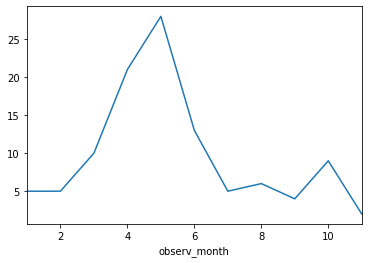

In [58]:
rw_black.groupby('observ_month').count()['COMMON NAME'].plot();